# NSFW WARNING : DO NOT WATCH THIS IN PUBLIC

In [1]:
import pandas as pd
import seaborn as sns
from PIL import Image
import aiohttp
import io
import matplotlib.pyplot as plt
import asyncio
import nest_asyncio
from IPython.display import HTML

nest_asyncio.apply()
%matplotlib inline

In [2]:
originalFile = 'pornhub.com-db.csv'

#### Shrink large dataset

In [3]:
# originalDataset = pd.read_csv(originalFile, chunksize=100000, iterator=True, on_bad_lines='skip')
# for idx, chunk in enumerate(originalDataset):
    # chunk.to_csv(f'pornhub.com-db-shrinked{idx}-0.csv', mode='a', header=False, index=False) 

In [4]:
columns = ['embed','thumbnail','thumbnail2','title','tags','categories','pornstars','duration','views','likes','dislikes','thumbnail3','thumbnail4']

In [5]:
# dataset = pd.read_csv('pornhub.com-db-shrinked1-0.csv', delimiter='|', on_bad_lines='skip')
# dataset.to_csv('pornhub.com-db-shrinked1-0-fixed.csv', mode='a', header=False, index=False)

#### Data cleaning & processing

In [6]:
# datasetValidation = [len(dataset.iloc[i].embed.split('|')) == 13 for i in range(len(dataset))]
# dataset = dataset[datasetValidation]

In [7]:
# datasetFixed = pd.DataFrame([dataset.iloc[i].embed.split('|') for i in range(1, len(dataset))], columns=dataset.iloc[0].embed.split('|'))

In [8]:
# datasetFixed.to_csv('pornhub.com-db-shrinked1-0-fixed.csv', index=False, header=True, sep='|')

#### Data quality check

In [9]:
dataset = pd.read_csv(originalFile, delimiter='|', on_bad_lines='skip', header=None)
dataset.columns = columns
# dataset = pd.read_csv('pornhub.com-db-shrinked1-0-fixed.csv', delimiter='|', on_bad_lines='skip')
len(dataset)

3566044

In [10]:
dataset.value_counts();

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3566044 entries, 0 to 3566043
Data columns (total 13 columns):
 #   Column      Dtype  
---  ------      -----  
 0   embed       object 
 1   thumbnail   object 
 2   thumbnail2  object 
 3   title       object 
 4   tags        object 
 5   categories  object 
 6   pornstars   object 
 7   duration    int64  
 8   views       int64  
 9   likes       float64
 10  dislikes    float64
 11  thumbnail3  object 
 12  thumbnail4  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 353.7+ MB


In [12]:
def convertStringDelimiterToList(Row):
    try:
        Row['pornstars']=  Row['pornstars'].split(';')
        Row['tags']=  Row['tags'].split(';')
        Row['categories']=  Row['categories'].split(';')
        return Row
    except AttributeError:
        print(Row)
        raise AttributeError

In [13]:
dropNAN = dataset.dropna(subset=['pornstars', 'tags', 'categories'])

In [14]:
processedDataset = dropNAN.apply(convertStringDelimiterToList, axis=1)

In [15]:
dataset.head()

embed  \
0  <iframe src="https://www.pornhub.com/embed/f4c...   
1  <iframe src="https://www.pornhub.com/embed/3ee...   
2  <iframe src="https://www.pornhub.com/embed/e5e...   
3  <iframe src="https://www.pornhub.com/embed/f8e...   
4  <iframe src="https://www.pornhub.com/embed/493...   

                                           thumbnail  \
0  https://di.phncdn.com/videos/200708/12/347/ori...   
1  https://di.phncdn.com/videos/200705/06/417/ori...   
2  https://di.phncdn.com/videos/200704/18/518/ori...   
3  https://di.phncdn.com/videos/200706/05/592/ori...   
4  https://di.phncdn.com/videos/201010/27/6401/or...   

                                          thumbnail2  \
0  https://di.phncdn.com/videos/200708/12/347/ori...   
1  https://di.phncdn.com/videos/200705/06/417/ori...   
2  https://di.phncdn.com/videos/200704/18/518/ori...   
3  https://di.phncdn.com/videos/200706/05/592/ori...   
4  https://di.phncdn.com/videos/201010/27/6401/or...   

                               title  \
0  Heather brooke swallo from condom   
1               HEATHER IN CHRISTMAS   
2                Blowjob Instruction   
3         heather brooke-talks dirty   
4       Hot blonde doing the Laundry   

                                                tags  \
0  ideepthroat.com;pornstar;swallow;blowjob;fetis...   
1  ideepthroat.com;fetish;blowjob;blonde;swallow;...   
2  ideepthroat.com;blowjob;pornstar;blonde;big-di...   
3  ideepthroat.com;blowjob;blonde;big-dick;big-ti...   
4  hot;blonde;laundry;anal;fuck;blowjob;cumshot;i...   

                                          categories       pornstars  \
0                   Blowjob;Pornstar;Verified Models  Heather Harmon   
1            Blowjob;Fetish;Pornstar;Verified Models  Heather Harmon   
2  Orgy;Blonde;Blowjob;Pornstar;Threesome;Verifie...  Heather Harmon   
3                   Blowjob;Pornstar;Verified Models  Heather Harmon   
4               Blonde;Pornstar;Anal;Verified Models  Heather Harmon   

   duration    views   likes  dislikes  \
0        99  2641982  3134.0     478.0   
1       126   992963  1783.0     277.0   
2        86   838618   722.0     128.0   
3       110  3439581  3554.0     461.0   
4       153   157164   145.0      33.0   

                                          thumbnail3  \
0  https://di.phncdn.com/videos/200708/12/347/ori...   
1  https://di.phncdn.com/videos/200705/06/417/ori...   
2  https://di.phncdn.com/videos/200704/18/518/ori...   
3  https://di.phncdn.com/videos/200706/05/592/ori...   
4  https://di.phncdn.com/videos/201010/27/6401/or...   

                                          thumbnail4  
0  https://di.phncdn.com/videos/200708/12/347/ori...  
1  https://di.phncdn.com/videos/200705/06/417/ori...  
2  https://di.phncdn.com/videos/200704/18/518/ori...  
3  https://di.phncdn.com/videos/200706/05/592/ori...  
4  https://di.phncdn.com/videos/201010/27/6401/or...

In [16]:
dataset.describe()

duration         views         likes      dislikes
count  3.566044e+06  3.566044e+06  3.199098e+06  3.199098e+06
mean   5.200755e+02  7.522847e+04  2.643736e+02  6.039052e+01
std    6.945139e+02  6.658425e+05  2.112732e+03  7.231787e+02
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
25%    9.800000e+01  3.440000e+02  5.000000e+00  0.000000e+00
50%    3.230000e+02  2.267000e+03  2.100000e+01  2.000000e+00
75%    6.720000e+02  1.921700e+04  9.300000e+01  1.400000e+01
max    1.033800e+05  2.256445e+08  6.638880e+05  2.726260e+05

In [17]:
# giving one row to the parameter will return networked images
async def networkImage(Row, title="", disable=False):
    imageFolder = []

    async def requestImage(imageUrl):
        async with aiohttp.ClientSession() as session:
            async with session.get(imageUrl) as response:
                return await response.read()

    plt.rcParams["figure.figsize"] = (14, 10)
    # We want to assure than there are only 25 plots
    count = 1
    try:
        # Loop through thumbnail 1,2,3,4
        for idx in range(1, 5):
            # there is no 'thumbnail1', it's just 'thumbnail'
            if idx == 1:
                idx = ''
            # If thumbnail does not exists, continue
            if Row[f'thumbnail{idx}'] is None:
                continue
            # Convert from pandas series title to title
            # If it fails, just leave it
            try:
                Thumbnail = Row[f'thumbnail{idx}'].values[0]
            except AttributeError:
                Thumbnail = Row[f'thumbnail{idx}']

            imageFolder.append(Thumbnail.split(';'))


            # Request the all the image inside the thumbnail
        tasks = [[asyncio.create_task(requestImage(imageUrl)) for imageUrl in imageUrls] for imageUrls in imageFolder]
        imgsIO = [await asyncio.gather(*task) for task in tasks]

        # Process the images
        for album in imgsIO:
            for img in album:
                img = Image.open(io.BytesIO(img))
                plt.subplot(5, 5, count)
                plt.imshow(img)
                count += 1
                
                # If it printed more than 25 images, break the loop
                if count >= 25:
                    raise StopIteration
    except StopIteration:
        pass
    if not disable:
        plt.suptitle(title)
    plt.rcParams["figure.figsize"] = (6, 4)
    plt.plot()
    plt.show()

In [18]:
# Used to request multiple row images
async def reqMultipleImage(rows):
    for _, row in rows.iterrows():
        await networkImage(row, row['title'])

# General Analysis

The most viewed porn

In [19]:
mostViewed = dataset[dataset['likes'] == dataset['likes'].max()]
mostViewed

embed  \
496481  <iframe src="https://www.pornhub.com/embed/ph5...   

                                                thumbnail  \
496481  https://di.phncdn.com/videos/201802/10/1541312...   

                                               thumbnail2  \
496481  https://di.phncdn.com/videos/201802/10/1541312...   

                                                    title  \
496481  Playing a Game With Hot Step Sister - Anastasi...   

                                                     tags  \
496481  point-of-view;step-fuck;hot;blonde;babe;fetish...   

                                               categories  \
496481  Amateur;Babe;Blonde;Creampie;Pornstar;Teen (18...   

                                                pornstars  duration  \
496481  Alex Adams;Anastasia Knight;Johnny Sins;Lexi L...      1730   

            views     likes  dislikes  \
496481  169345093  663888.0  205405.0   

                                               thumbnail3  \
496481  https://di.phncdn.com/videos/201802/10/1541312...   

                                               thumbnail4  
496481  https://di.phncdn.com/videos/201802/10/1541312...

#### Thumbnail of most viewed porn

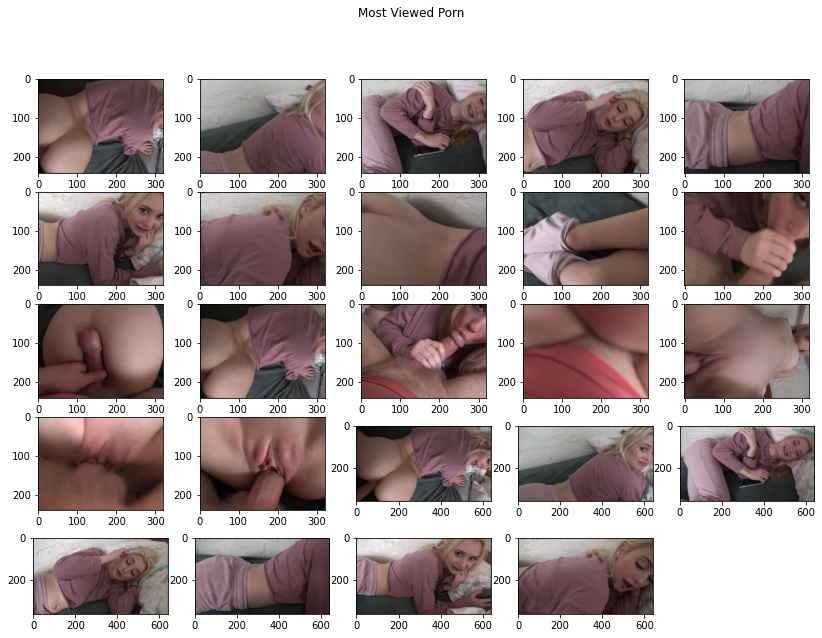

In [20]:
asyncio.run(networkImage(mostViewed, 'Most Viewed Porn'))

#### Video of most viewed porn

In [21]:
HTML(mostViewed['embed'].values[0])

/home/bigmart000918/.local/lib/python3.8/site-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


#### The most liked porn

In [22]:
dataset[dataset['likes'] == dataset['likes'].max()]

embed  \
496481  <iframe src="https://www.pornhub.com/embed/ph5...   

                                                thumbnail  \
496481  https://di.phncdn.com/videos/201802/10/1541312...   

                                               thumbnail2  \
496481  https://di.phncdn.com/videos/201802/10/1541312...   

                                                    title  \
496481  Playing a Game With Hot Step Sister - Anastasi...   

                                                     tags  \
496481  point-of-view;step-fuck;hot;blonde;babe;fetish...   

                                               categories  \
496481  Amateur;Babe;Blonde;Creampie;Pornstar;Teen (18...   

                                                pornstars  duration  \
496481  Alex Adams;Anastasia Knight;Johnny Sins;Lexi L...      1730   

            views     likes  dislikes  \
496481  169345093  663888.0  205405.0   

                                               thumbnail3  \
496481  https://di.phncdn.com/videos/201802/10/1541312...   

                                               thumbnail4  
496481  https://di.phncdn.com/videos/201802/10/1541312...

#### The most disliked porn

In [23]:
dataset[dataset['likes'] == dataset['likes'].max()]

embed  \
496481  <iframe src="https://www.pornhub.com/embed/ph5...   

                                                thumbnail  \
496481  https://di.phncdn.com/videos/201802/10/1541312...   

                                               thumbnail2  \
496481  https://di.phncdn.com/videos/201802/10/1541312...   

                                                    title  \
496481  Playing a Game With Hot Step Sister - Anastasi...   

                                                     tags  \
496481  point-of-view;step-fuck;hot;blonde;babe;fetish...   

                                               categories  \
496481  Amateur;Babe;Blonde;Creampie;Pornstar;Teen (18...   

                                                pornstars  duration  \
496481  Alex Adams;Anastasia Knight;Johnny Sins;Lexi L...      1730   

            views     likes  dislikes  \
496481  169345093  663888.0  205405.0   

                                               thumbnail3  \
496481  https://di.phncdn.com/videos/201802/10/1541312...   

                                               thumbnail4  
496481  https://di.phncdn.com/videos/201802/10/1541312...

#### Average Likes Vs Dislikes

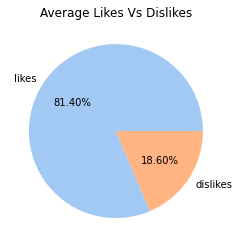

In [24]:
likes, dislikes = dataset['likes'], dataset['dislikes']
data = [likes.mean(), dislikes.mean()]
labels = ['likes', 'dislikes']
colors = sns.color_palette('pastel', 2)
plt.pie(data, labels=labels, colors=colors, autopct='%1.2f%%')
plt.title('Average Likes Vs Dislikes');

#### Linear Relationship Between Each Variables

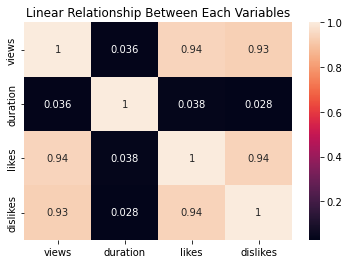

In [25]:
plot = sns.heatmap(dataset[['views', 'duration', 'likes', 'dislikes']].corr(), annot=True)
plot.set_title('Linear Relationship Between Each Variables');

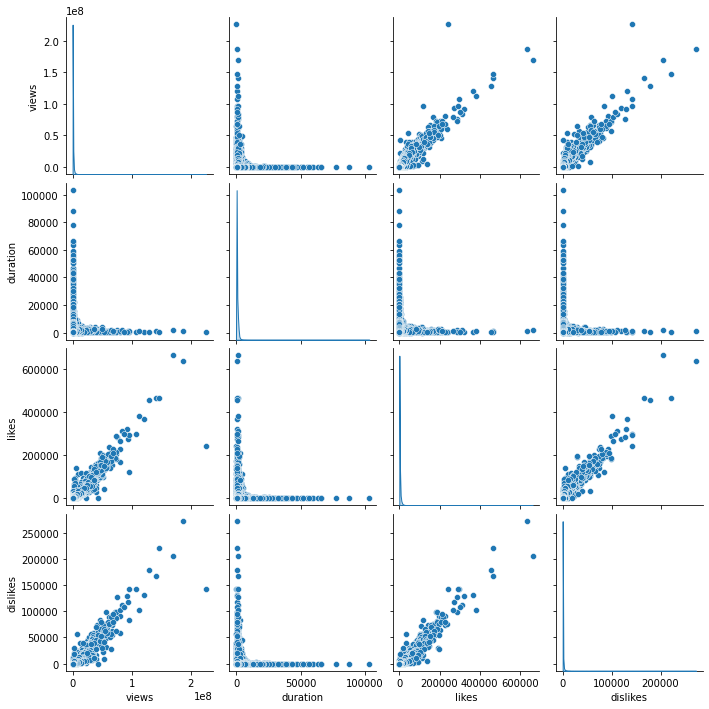

In [26]:
sns.pairplot(dataset[['views', 'duration', 'likes', 'dislikes']], diag_kind = 'kde');

# Pornstars

#### Number of pornstars in the dataset

In [27]:
numVideoShotByPornstar = processedDataset.explode('pornstars')['pornstars']
numPornstars = len(numVideoShotByPornstar.unique())
f"There are {numPornstars} number of pornstars in the dataset"

'There are 17914 number of pornstars in the dataset'

#### Top 10 pornstars who shot the most porn

Text(0.5, 1.0, 'Top 10 pornstars who shot the most porn')

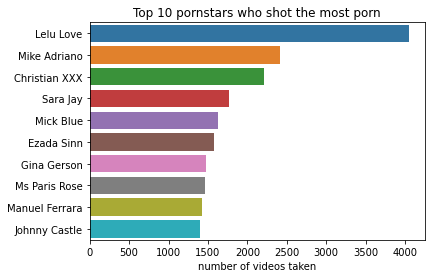

In [28]:
nVideoByPornstar = pd.DataFrame(numVideoShotByPornstar.value_counts()).head(10)
nVideoByPornstar.columns = ['number of videos taken']
plot = sns.barplot(x=nVideoByPornstar['number of videos taken'], y=nVideoByPornstar.index)
plot.set_title('Top 10 pornstars who shot the most porn');

#### Top 10 pornstars who shot the least porn

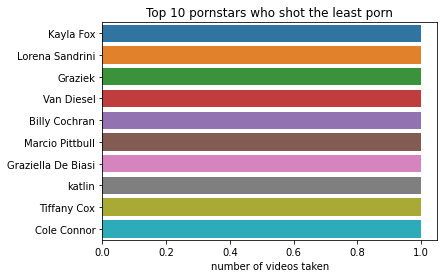

In [29]:
nVideoByPornstar = pd.DataFrame(numVideoShotByPornstar.value_counts()).tail(10)
nVideoByPornstar.columns = ['number of videos taken']
plot = sns.barplot(x=nVideoByPornstar['number of videos taken'], y=nVideoByPornstar.index)
plot.set_title('Top 10 pornstars who shot the least porn');

#### Top 10 Cumulative Porn Views By Pornstar (Top 10 Total Porn Views By Pornstar)

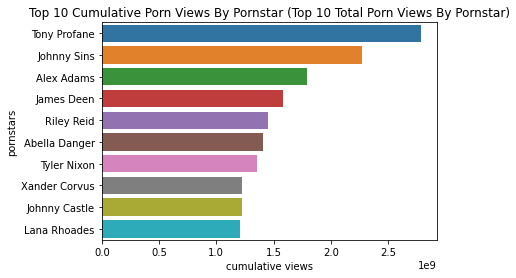

In [30]:
pornstarByVideoViews = processedDataset.explode('pornstars').groupby('pornstars')['views'].sum()
top10PornstarByVideoViews = pd.DataFrame(pornstarByVideoViews).sort_values(by='views', ascending=False).head(10)
top10PornstarByVideoViews.columns = ['cumulative views']
plot = sns.barplot(x=top10PornstarByVideoViews['cumulative views'], y=top10PornstarByVideoViews.index)
plot.set_title('Top 10 Cumulative Porn Views By Pornstar (Top 10 Total Porn Views By Pornstar)');

#### 10 Least Cumulative Porn Views By Pornstar (Least 10 Total Porn Views By Pornstar)

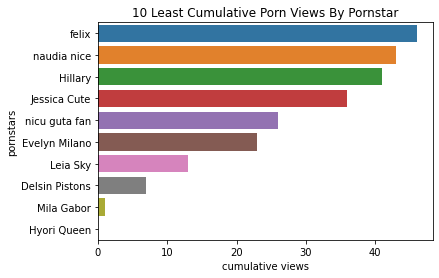

In [31]:
least10PornstarByVideoViews = pd.DataFrame(pornstarByVideoViews).sort_values(by='views', ascending=False).tail(10)
least10PornstarByVideoViews.columns = ['cumulative views']
plot = sns.barplot(x=least10PornstarByVideoViews['cumulative views'], y=least10PornstarByVideoViews.index)
plot.set_title('10 Least Cumulative Porn Views By Pornstar');

#### Top 10 Videos From The Most Popular Pornstar

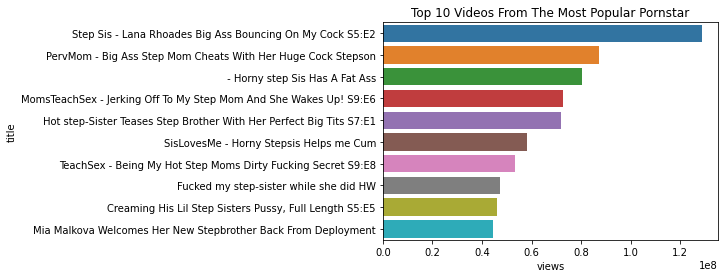

In [32]:
mostPopularPornstar = top10PornstarByVideoViews.sort_values(by=['cumulative views'], ascending=False).index[0]
filterPornstar = processedDataset.apply(lambda x: True if mostPopularPornstar in x['pornstars'] else False, axis=1)
filterPornstar = processedDataset[filterPornstar]
sortedFilterPornstar = filterPornstar.sort_values(by='views', ascending=False).head(10)
plot = sns.barplot(x=sortedFilterPornstar['views'], y=sortedFilterPornstar['title'])
plot.set_title('Top 10 Videos From The Most Popular Pornstar');

#### The Most Viewed Video's Thumbnails From The Most Popular Pornstar

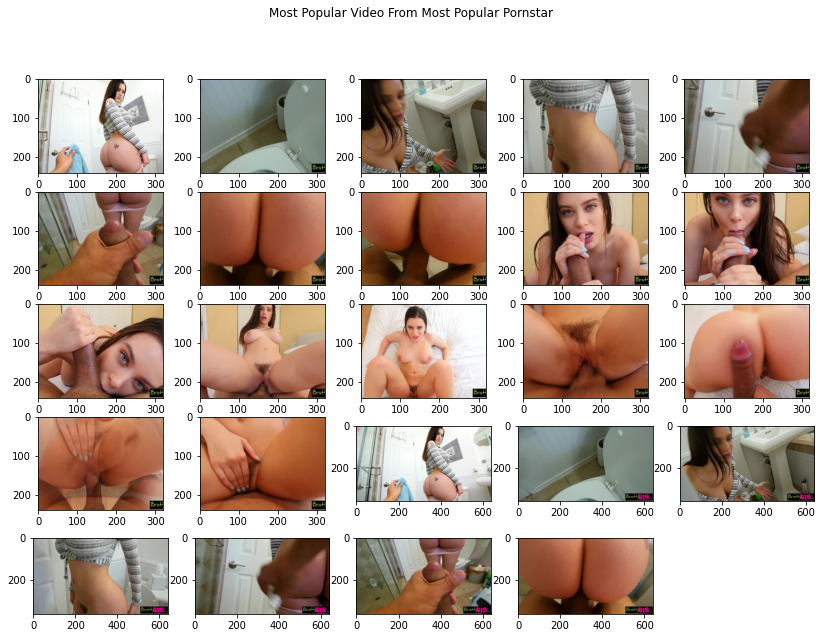

In [33]:
explodedDataset = processedDataset.explode('pornstars')
mostPopularVidFromMostPopularPornstar = explodedDataset.apply(lambda x: True 
            if x['title'] == sortedFilterPornstar['title'].values[0] and x['pornstars'] == mostPopularPornstar else False, axis=1)
mostPopularVidFromMostPopularPornstar = explodedDataset[mostPopularVidFromMostPopularPornstar]
if len(mostPopularVidFromMostPopularPornstar):
    asyncio.run(networkImage(mostPopularVidFromMostPopularPornstar, 'Most Popular Video From Most Popular Pornstar'))

#### Average Porn Views Per Video of The Top 10 Popular Pornstar

In [34]:
def matchMoreThanOnePornstar(firstList, secondList):
    for pornstar in firstList:
        if pornstar in secondList:
            return True
    return False

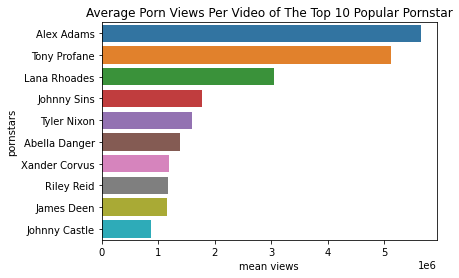

In [35]:
top10PopularPornstar = top10PornstarByVideoViews.index
explodedDataset = processedDataset.explode('pornstars')
filterTop10PopularPornstar = explodedDataset.apply(lambda x: 
                                                        True if matchMoreThanOnePornstar(top10PopularPornstar, x['pornstars']) else False, axis=1)
filterTop10PopularPornstar = explodedDataset[filterTop10PopularPornstar].groupby('pornstars')['views'].mean()
meanViewsOfTop10PopularPornstar = pd.DataFrame(filterTop10PopularPornstar)
meanViewsOfTop10PopularPornstar.columns = ['mean views']
meanViewsOfTop10PopularPornstar = meanViewsOfTop10PopularPornstar.sort_values(by='mean views',ascending=False)
plot = sns.barplot(x=meanViewsOfTop10PopularPornstar['mean views'], y=meanViewsOfTop10PopularPornstar.index)
plot.set_title('Average Porn Views Per Video of The Top 10 Popular Pornstar');

# Porn Tags

#### Number of Unique Porn Tags In The Dataset

In [36]:
dropNoTagVideo = dataset.dropna(subset=['tags'])
splitTagsFromVideo=dropNoTagVideo['tags'].map(lambda x: x.split(';'))
PopularPornTagUploads = splitTagsFromVideo.explode('tags')
numPornTags = len(PopularPornTagUploads.unique())
f"There are {numPornTags} unique Porn tags"

'There are 898289 unique Porn tags'

#### Top 10 Popular Porn Tag Uploads

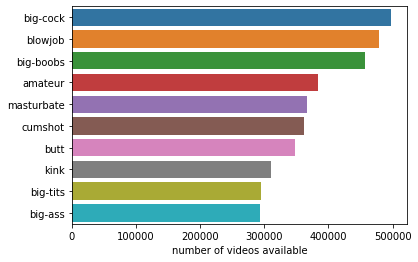

In [37]:
nTopVideoUploadsByTags = pd.DataFrame(PopularPornTagUploads.value_counts()).head(10)
nTopVideoUploadsByTags.columns = ['number of videos available']
sns.barplot(x=nTopVideoUploadsByTags['number of videos available'], y=nTopVideoUploadsByTags.index);

#### Least 10 Porn Tag Uploads

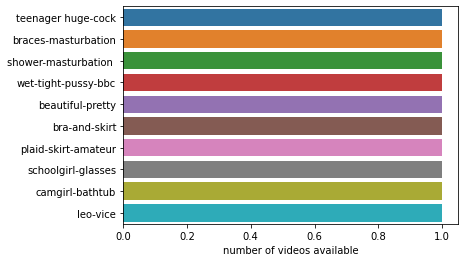

In [38]:
nLowestVideoUploadsByTags = pd.DataFrame(PopularPornTagUploads.value_counts()).tail(10)
nLowestVideoUploadsByTags.columns = ['number of videos available']
sns.barplot(x=nLowestVideoUploadsByTags['number of videos available'], y=nLowestVideoUploadsByTags.index);

#### Top 10 Cumulative Porn Views By Tags (Top 10 Total Porn Views By Tags)

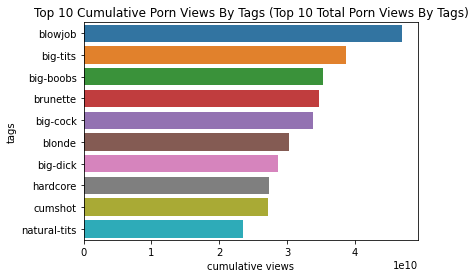

In [39]:
tagsByTopVideoCumulativeViews = processedDataset.explode('tags').groupby('tags')['views'].sum()
top10tagsByCumulativeVideoViews = pd.DataFrame(tagsByTopVideoCumulativeViews).sort_values(by='views', ascending=False).head(10)
top10tagsByCumulativeVideoViews.columns = ['cumulative views']
plot = sns.barplot(x=top10tagsByCumulativeVideoViews['cumulative views'], y=top10tagsByCumulativeVideoViews.index)
plot.set_title('Top 10 Cumulative Porn Views By Tags (Top 10 Total Porn Views By Tags)');

#### Top 5 Most Popular Video's Thumbnails From The Most Popular Tag

In [40]:
mostPopularTag = top10tagsByCumulativeVideoViews.sort_values(by='cumulative views', ascending=False).head(1).index
explodedDataset = processedDataset.explode('tags')

# Filter the dataset to get the videos that have the most popular tag
mostPopularVidFromMostPopularTag = explodedDataset.apply(lambda x: True if x['tags'] == mostPopularTag else False, axis=1)
mostPopularVidFromMostPopularTagWithOutDuplicates = explodedDataset[mostPopularVidFromMostPopularTag].drop_duplicates(subset=['title'])
# Sort the videos by views and get the top 5 videos
top5VidFromMostPopularTagWithOutDuplicates = mostPopularVidFromMostPopularTagWithOutDuplicates.sort_values(by='views', ascending=False).head(5)

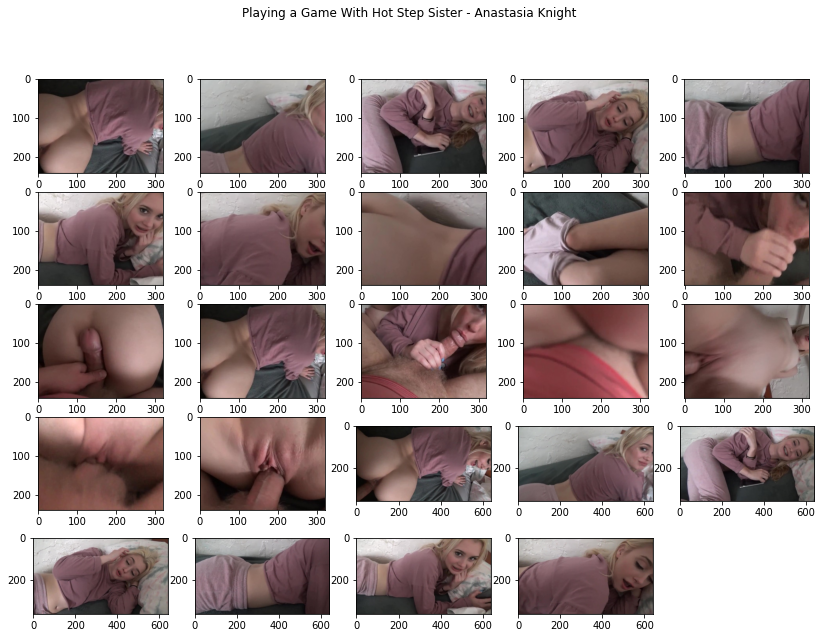

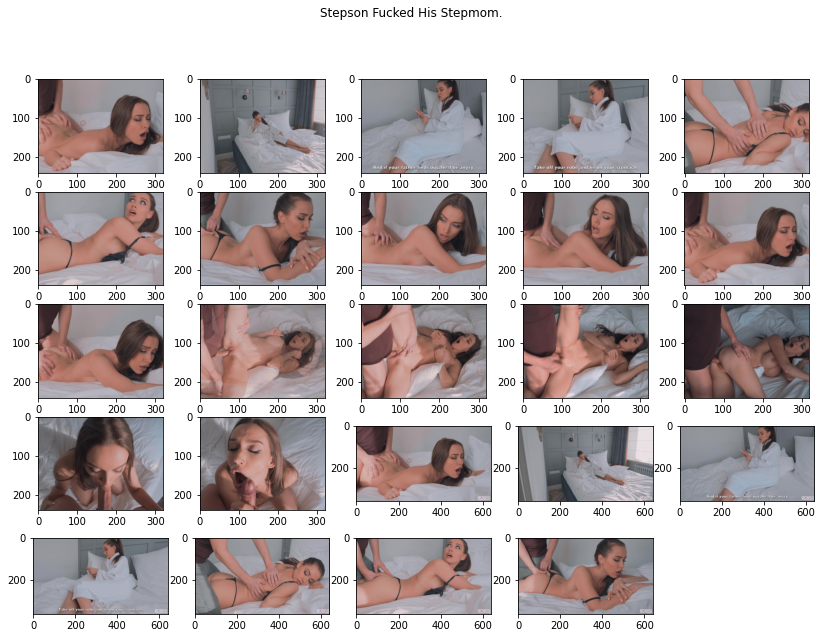

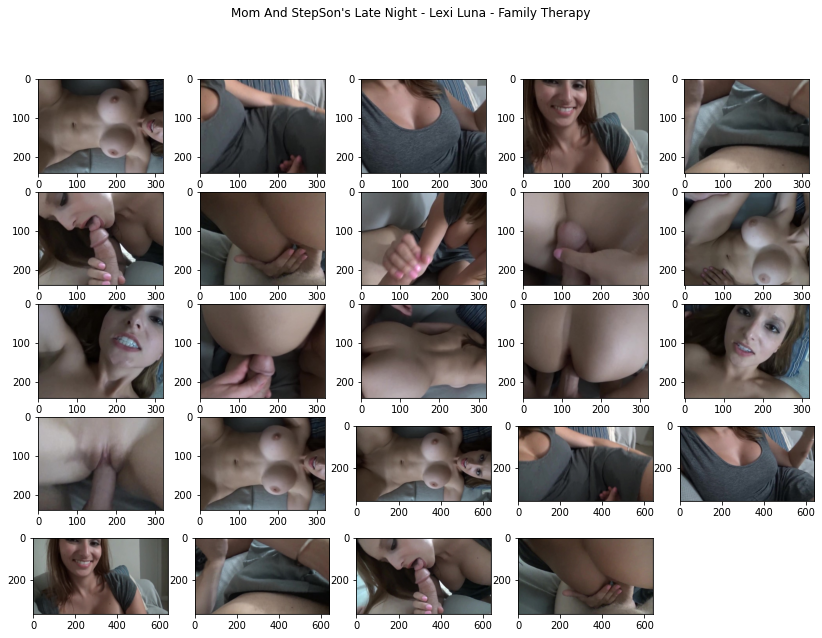

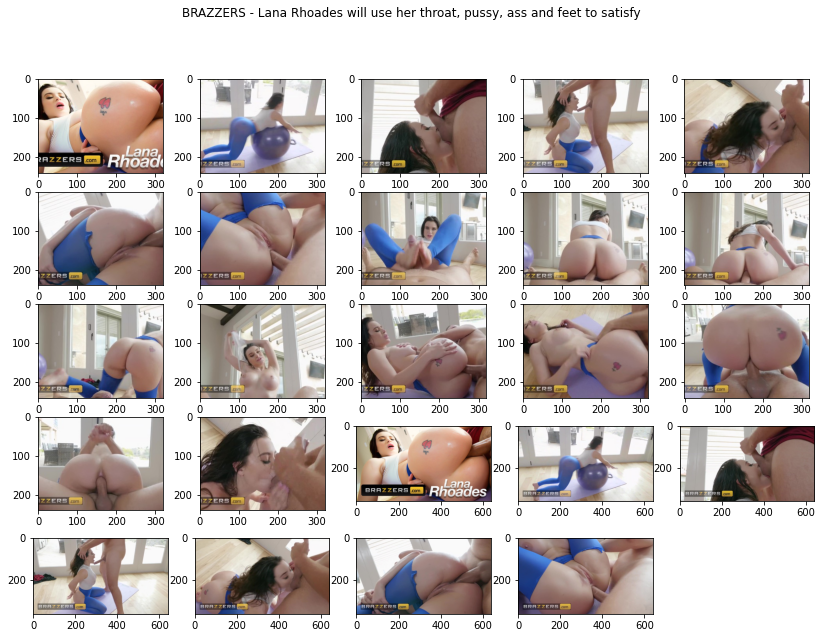

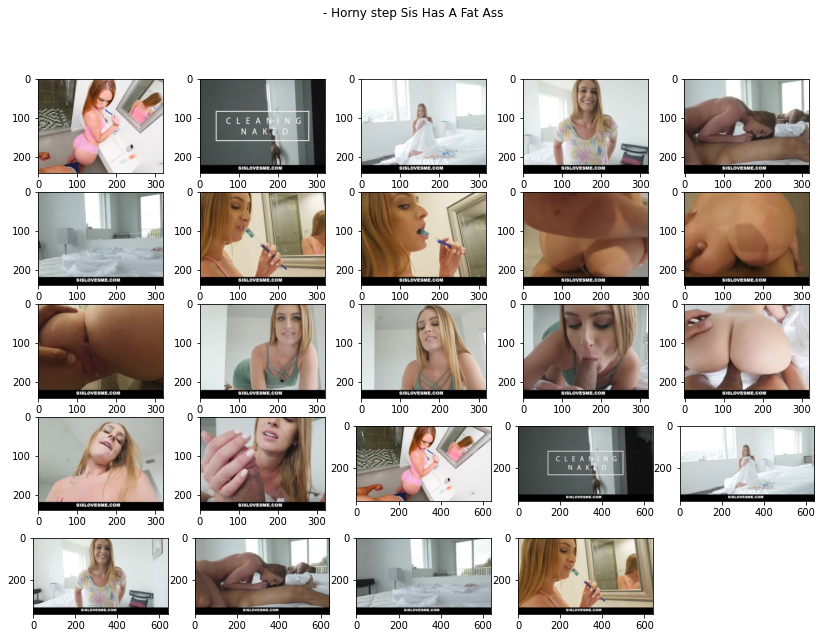

In [41]:
# Iterate over the top 5 videos and display thumbnails
asyncio.run(reqMultipleImage(top5VidFromMostPopularTagWithOutDuplicates))

#### Top 5 Most Popular Videos From The Most Popular Tag

In [42]:
HTML(''.join([row['embed'] for _, row in top5VidFromMostPopularTagWithOutDuplicates.iterrows()]))

/home/bigmart000918/.local/lib/python3.8/site-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


#### 10 Lowest Cumulative Porn Views By Tags (Least 10 Total Porn Views By Tags)

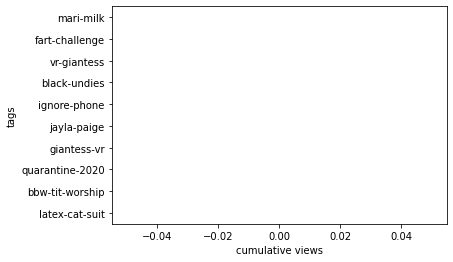

In [43]:
least10tagsByCumulativeVideoViews = pd.DataFrame(tagsByTopVideoCumulativeViews).sort_values(by='views', ascending=False).tail(10)
least10tagsByCumulativeVideoViews.columns = ['cumulative views']
sns.barplot(x=least10tagsByCumulativeVideoViews['cumulative views'], y=least10tagsByCumulativeVideoViews.index);

# Porn Categories

#### Number of Unique Porn Categories In The Dataset

In [44]:
dropNoCategoriesVideo = dataset.dropna(subset=['categories'])
splitCategoriesFromVideo=dropNoCategoriesVideo['categories'].map(lambda x: x.split(';'))
PopularPornCategoryUploads = splitCategoriesFromVideo.explode('categories')
numPornCategories = len(PopularPornCategoryUploads.unique())
f"There are {numPornCategories} Unique Porn Categories"

'There are 138 Unique Porn Categories'

#### Top 10 Popular Porn Category Uploads

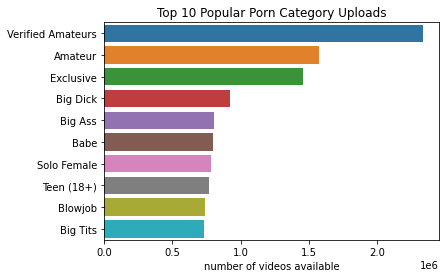

In [45]:
nTopVideoUploadsByCategories = pd.DataFrame(PopularPornCategoryUploads.value_counts()).head(10)
nTopVideoUploadsByCategories.columns = ['number of videos available']
plot = sns.barplot(x=nTopVideoUploadsByCategories['number of videos available'], y=nTopVideoUploadsByCategories.index)
plot.set_title('Top 10 Popular Porn Category Uploads');

#### Least 10 Porn Category Uploads

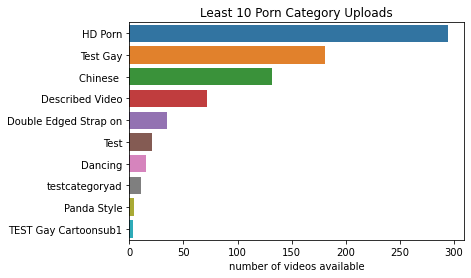

In [46]:
nLeastVideoUploadsByCategories = pd.DataFrame(PopularPornCategoryUploads.value_counts()).tail(10)
nLeastVideoUploadsByCategories.columns = ['number of videos available']
plot = sns.barplot(x=nLeastVideoUploadsByCategories['number of videos available'], y=nLeastVideoUploadsByCategories.index);
plot.set_title('Least 10 Porn Category Uploads');

#### Top 10 Cumulative Porn Views By Categories (Top 10 Total Porn Views By Categories)

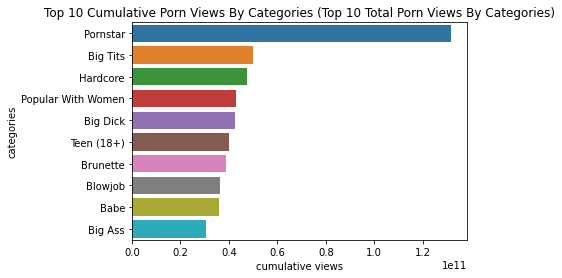

In [47]:
categoriesByTopVideoCumulativeViews = processedDataset.explode('categories').groupby('categories')['views'].sum()
top10CategoriesByCumulativeVideoViews = pd.DataFrame(categoriesByTopVideoCumulativeViews).sort_values(by='views', ascending=False).head(10)
top10CategoriesByCumulativeVideoViews.columns = ['cumulative views']
plot = sns.barplot(x=top10CategoriesByCumulativeVideoViews['cumulative views'], y=top10CategoriesByCumulativeVideoViews.index)
plot.set_title('Top 10 Cumulative Porn Views By Categories (Top 10 Total Porn Views By Categories)');

#### 10 Least Cumulative Porn Views By Categories (Least 10 Total Porn Views By Categories)

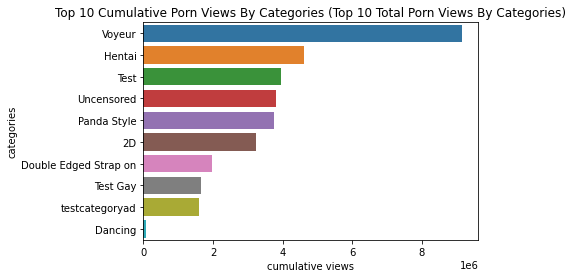

In [48]:
least10CategoriesByVideoViews = pd.DataFrame(categoriesByTopVideoCumulativeViews).sort_values(by='views', ascending=False).tail(10)
least10CategoriesByVideoViews.columns = ['cumulative views']
plot = sns.barplot(x=least10CategoriesByVideoViews['cumulative views'], y=least10CategoriesByVideoViews.index)
plot.set_title('Top 10 Cumulative Porn Views By Categories (Top 10 Total Porn Views By Categories)');

#### What Kind of Tags Are Associated With "Popular With Women" (Type Categories Sorted By Views)

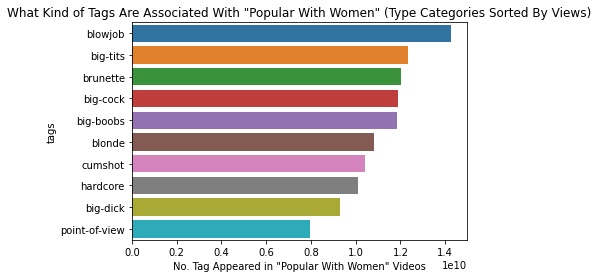

In [49]:
explodedDataset = processedDataset.explode('categories')
PopularWithWomenConnection = explodedDataset[explodedDataset['categories'] == 'Popular With Women']
PopularWithWomenTags = PopularWithWomenConnection.explode('tags')[['tags', 'views']]
PopularWithWomenTagCount = PopularWithWomenTags.groupby('tags').sum()
sortedPopularWithWomenTagCount = PopularWithWomenTagCount.sort_values(by=['views'],ascending=False).head(10)
sortedPopularWithWomenTagCount = pd.DataFrame(sortedPopularWithWomenTagCount)
sortedPopularWithWomenTagCount.columns = ['No. Tag Appeared in "Popular With Women" Videos']
plot = sns.barplot(y=sortedPopularWithWomenTagCount.index, x=sortedPopularWithWomenTagCount['No. Tag Appeared in "Popular With Women" Videos'])
plot.set_title('What Kind of Tags Are Associated With "Popular With Women" (Type Categories Sorted By Views)');

#### Top 5 Video Thumbnails That had The Highest Views In "Popular With Women" Category

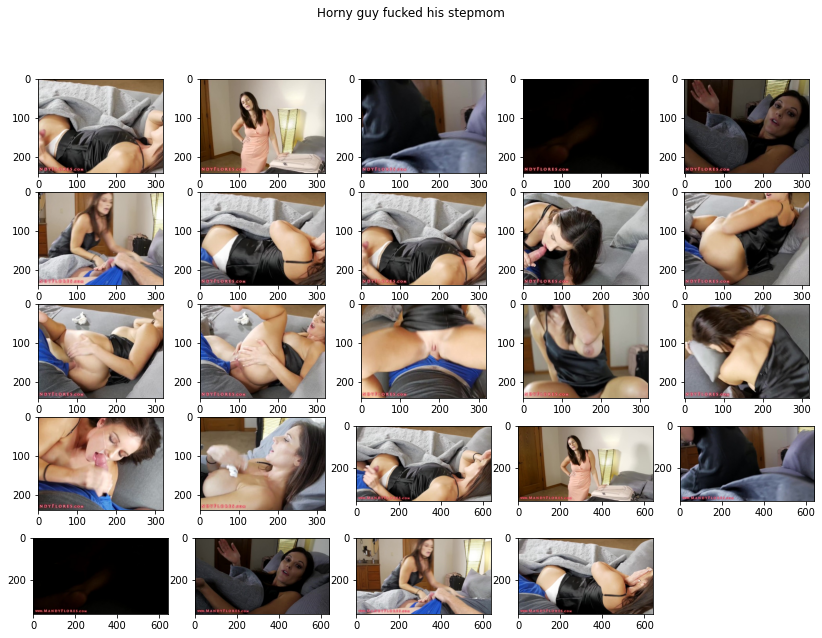

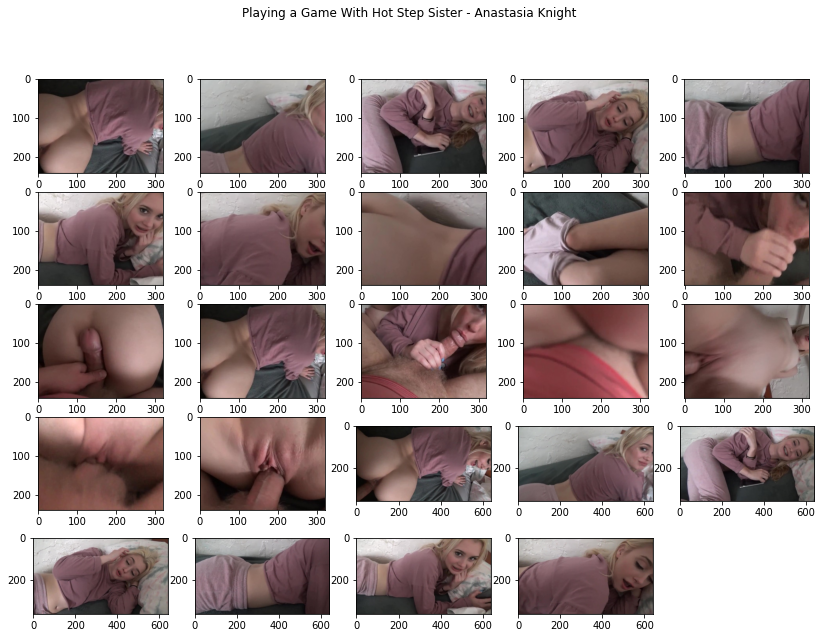

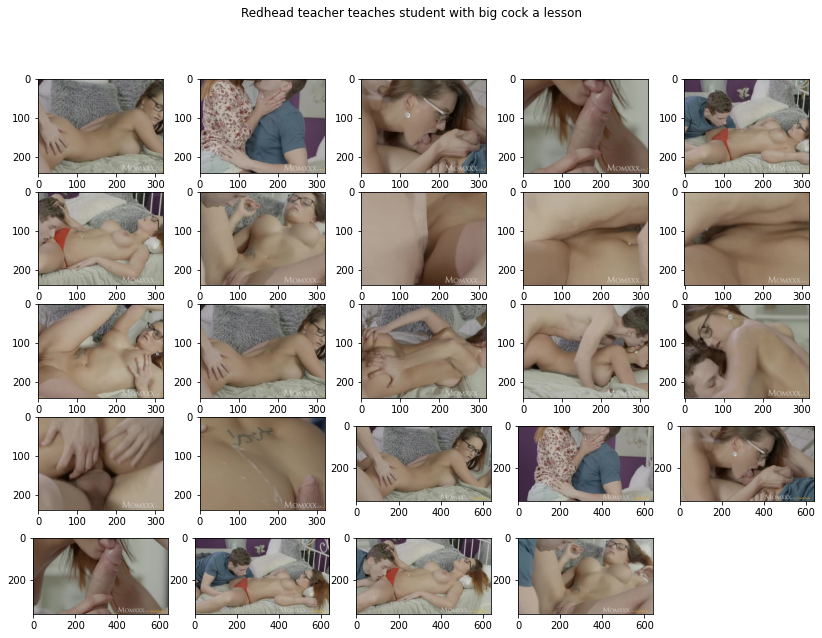

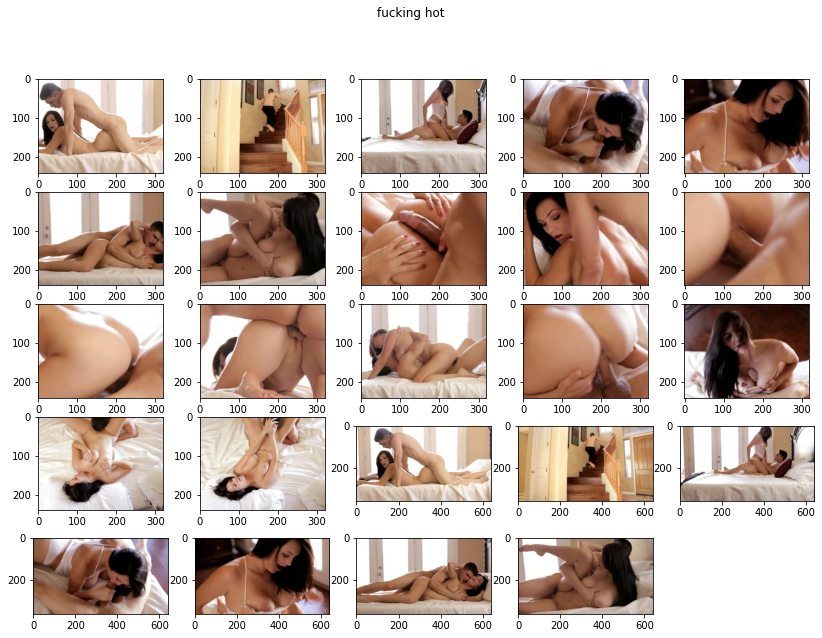

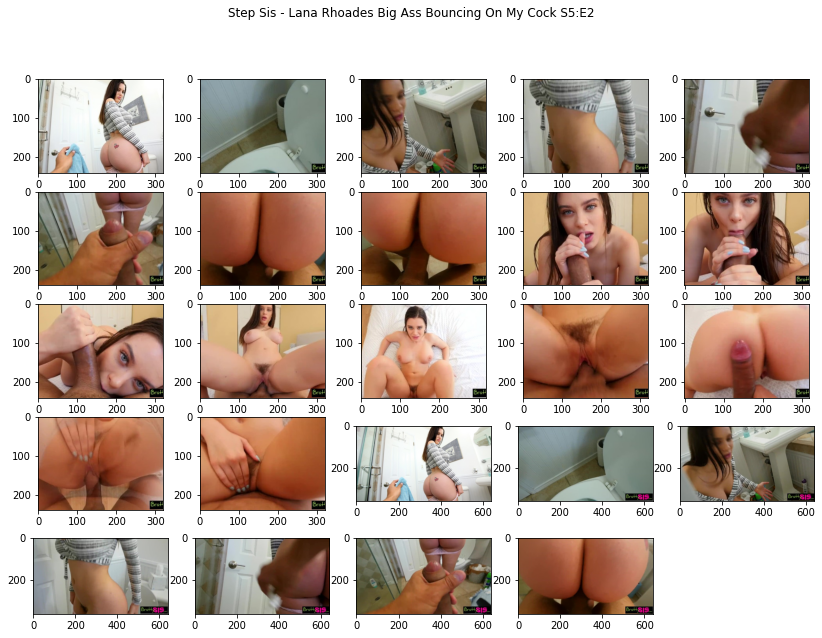

In [50]:
top5VideoThumbnailsInPopularWithWomenCategory = PopularWithWomenConnection.sort_values(by=['views'], ascending=False).head(5)
asyncio.run(reqMultipleImage(top5VideoThumbnailsInPopularWithWomenCategory))

#### Top 5 Videos That had The Highest Views In "Popular With Women" Category

In [51]:
HTML(''.join([row['embed'] for _, row in top5VideoThumbnailsInPopularWithWomenCategory.iterrows()]))

/home/bigmart000918/.local/lib/python3.8/site-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


#### What Kind of Tags Are Least Preferred In "Popular With Women" (Type Categories Sorted By Views)

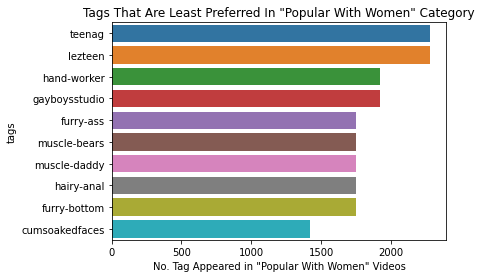

In [52]:
sortedPopularWithWomenTagCount = PopularWithWomenTagCount.sort_values(by=['views'],ascending=False).tail(10)
sortedPopularWithWomenTagCount = pd.DataFrame(sortedPopularWithWomenTagCount)
sortedPopularWithWomenTagCount.columns = ['No. Tag Appeared in "Popular With Women" Videos']
plot = sns.barplot(y=sortedPopularWithWomenTagCount.index, x=sortedPopularWithWomenTagCount['No. Tag Appeared in "Popular With Women" Videos']);
plot.set_title('Tags That Are Least Preferred In "Popular With Women" Category');